<a href="https://colab.research.google.com/github/nazihkalo/FIFA19-Scouting-Analysis/blob/master/Data_Mining_Project_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
!pip install geopandas

     |████████████████████████████████| 901kB 4.2MB/s 
     |████████████████████████████████| 17.9MB 35.9MB/s 
     |████████████████████████████████| 11.2MB 29.5MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=9c71a7d5a5a1ae6fff5d47a313aa5902338aa53063bc9088b325922cb6c43530
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime

# Maps
import geopandas as gpd

from math import pi

In [0]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Read Data

In [0]:
git_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/FIFA19_data.csv'

fifa = pd.read_csv(git_url)

In [0]:
# Copy of the dataframe
original_fifa = fifa.copy()

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
#Checking dataset for NA values
total_num = fifa.isnull().sum().sort_values(ascending=False)

perc = fifa.isnull().sum()/fifa.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
fifa_null = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

#Top nulls
top_null = fifa_null[fifa_null["Percentage %"]>0]
top_null.reset_index(inplace=True)
top_null.columns = ['index', "Total Missing Values", "Percentage %"]
top_null.head(10)

,index,Total Missing Values,Percentage %
0,Loaned From,16943,93.06
1,RAM,2085,11.45
2,LS,2085,11.45
3,ST,2085,11.45
4,RS,2085,11.45
5,LW,2085,11.45
6,LF,2085,11.45
7,CF,2085,11.45
8,RF,2085,11.45
9,RW,2085,11.45


Text(0.5, 1.0, 'Missing Values by column')

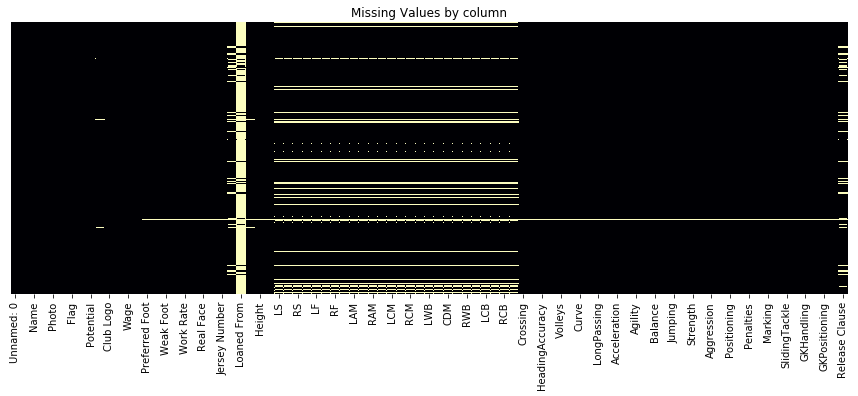

In [0]:
plt.figure(figsize=(15,5))
sns.heatmap(fifa.isnull(), cbar = False, yticklabels=False, cmap="magma" )
plt.title('Missing Values by column')

# Feature Engineering

In [0]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

#Create float Value column
fifa['Value_float'] = fifa['Value'].apply(value_to_int)

#Create float Wage Column
fifa['Wage_float'] = fifa['Wage'].apply(value_to_int)

print(fifa['Value_float'].head())
print(fifa['Wage_float'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value_float, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage_float, dtype: float64


## Create Position Group

In [0]:
#Define position groups
forwards = ['RF', 'ST', 'LW','LF', 'RS', 'LS', 'RW', 'CF' ]
defenders = ['RCB','CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
mids = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
gk = ['GK']

#Create Function to apply to df
def label_position(row):
    if row['Position'] in forwards:
        return 'Forward'
    if row['Position'] in defenders:
        return 'Defender'
    if row['Position'] in mids:
        return 'Midfielder'
    if row['Position'] in gk:
        return 'GoalKeeper'
    return 'Other'

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'] = fifa['Position_Group'].astype('category')

In [0]:
fifa['Position_Group'].value_counts()

Midfielder    6838
Defender      5866
Forward       3418
GoalKeeper    2025
Other           60
Name: Position_Group, dtype: int64

## Create club reputation column

In [0]:
#Clubs sorted by international Reputation
clubs_rep = fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

clubs_rep.head(10)

,International Reputation
Club,
FC Barcelona,74.0
FC Bayern München,73.0
Chelsea,70.0
Manchester United,69.0
Manchester City,69.0
Real Madrid,69.0
Arsenal,67.0
Paris Saint-Germain,67.0
Borussia Dortmund,66.0


In [0]:
#Add club reputation column
fifa['Club_Reputation'] =  fifa['International Reputation'].groupby(fifa['Club']).transform('sum')

fifa[['Club','Club_Reputation']].head(10)

,Club,Club_Reputation
0,FC Barcelona,74.0
1,Juventus,63.0
2,Paris Saint-Germain,67.0
3,Manchester United,69.0
4,Manchester City,69.0
5,Chelsea,70.0
6,Real Madrid,69.0
7,FC Barcelona,74.0
8,Real Madrid,69.0
9,Atlético Madrid,62.0


# Exploratory Data Analysis 

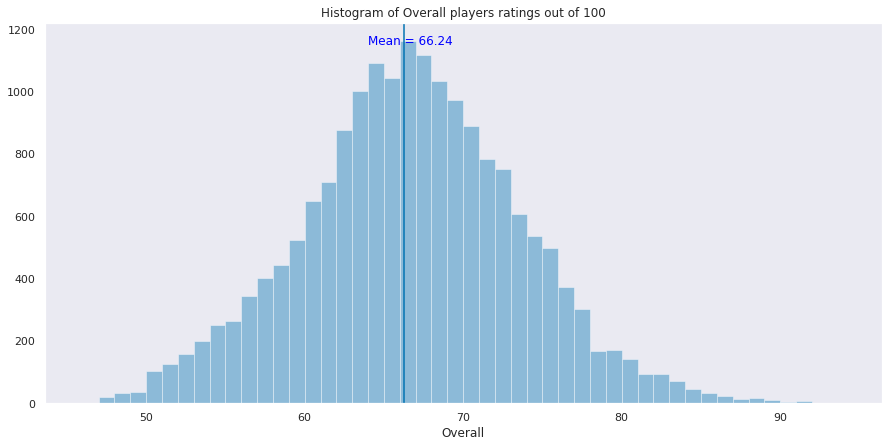

In [0]:
plt.figure(1 , figsize = (15 , 7))

sns.distplot(fifa['Overall'], bins = 48, kde = False)
plt.annotate(('Mean = '+ str(round(fifa['Overall'].mean(),2))), (64,1150), color = 'blue')

plt.axvline(x =fifa['Overall'].mean(), ymin = 0, ymax = 1)

plt.title('Histogram of Overall players ratings out of 100')
plt.show()

In [0]:
('Mean = '+ str(round(fifa['Overall'].mean(),2)))

'Mean = 66.24'

In [0]:
fifa.Overall.mean()

66.23869940132916

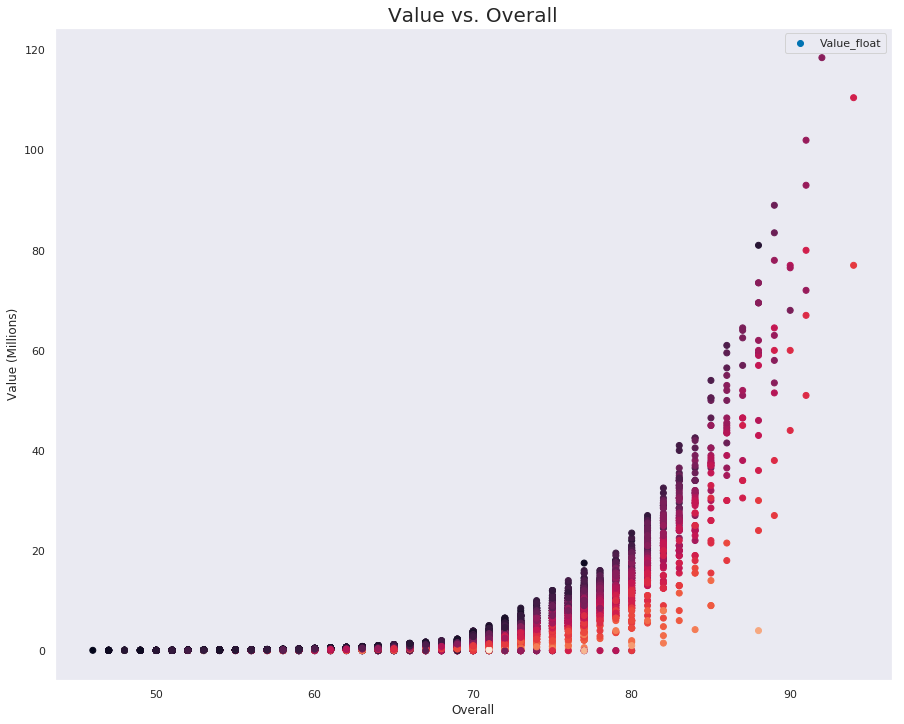

In [0]:
# Value vs. Overall
value = fifa.Value_float

position_category = fifa['Position'].astype('category')

fig, ax = plt.subplots(figsize= (15,12))

plt.scatter(x = 'Overall', y = value  / 1000000 , c = 'Age', data = fifa)

plt.ylabel('Value (Millions)')
plt.xlabel('Overall')
plt.title('Value vs. Overall', fontsize = 20)
plt.legend()

<Figure size 1080x864 with 0 Axes>

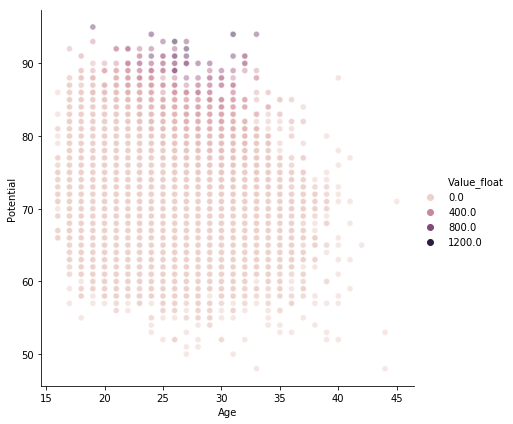

In [0]:
# Relation potential and age with respected value of players
plt.figure(figsize = (15,12))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=fifa);

## Position Analysis

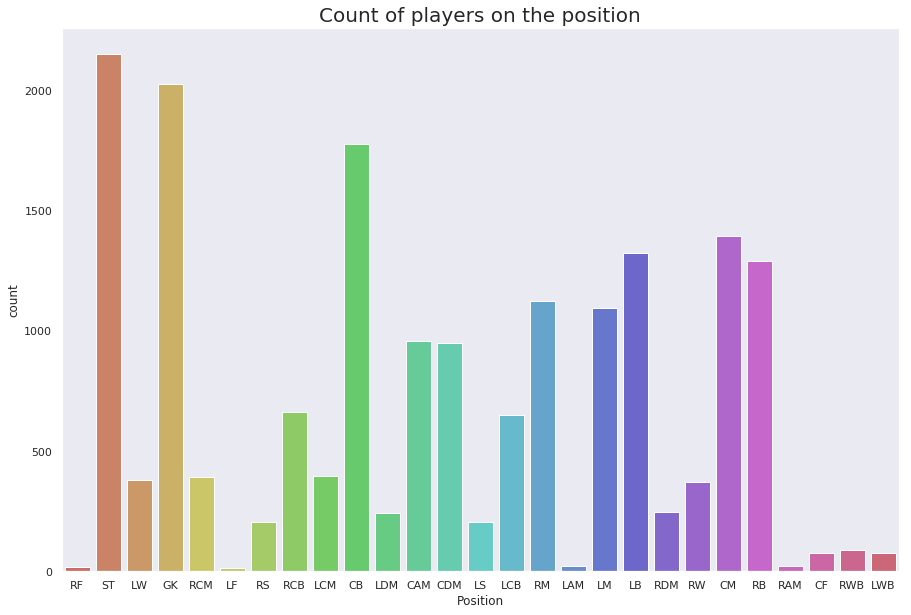

In [0]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position', data = fifa, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

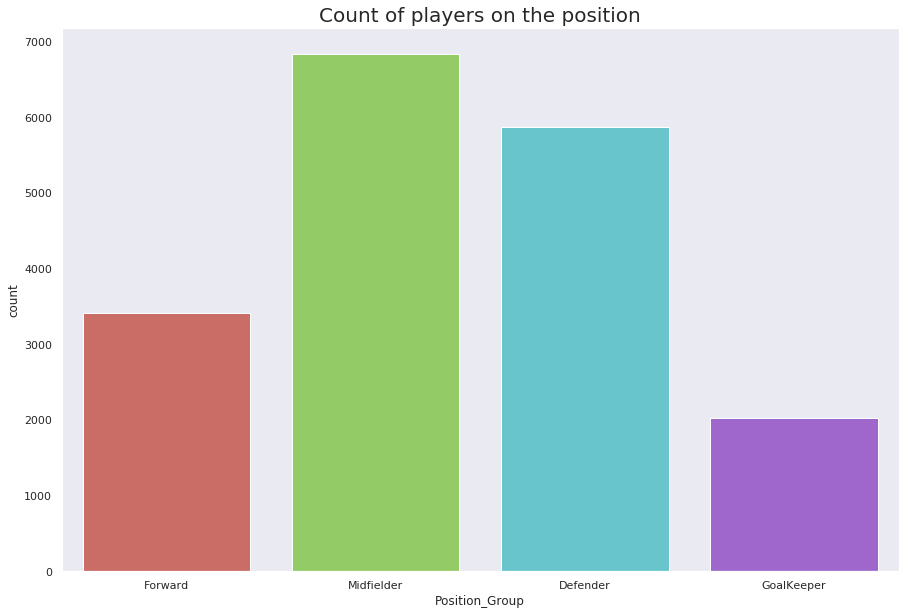

In [0]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position_Group', data = fifa,
                   order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'] ,palette = 'hls')

ax.set_title(label='Count of players on the position', fontsize=20);

Text(0, 0.5, 'Value in Euros (logscale)')

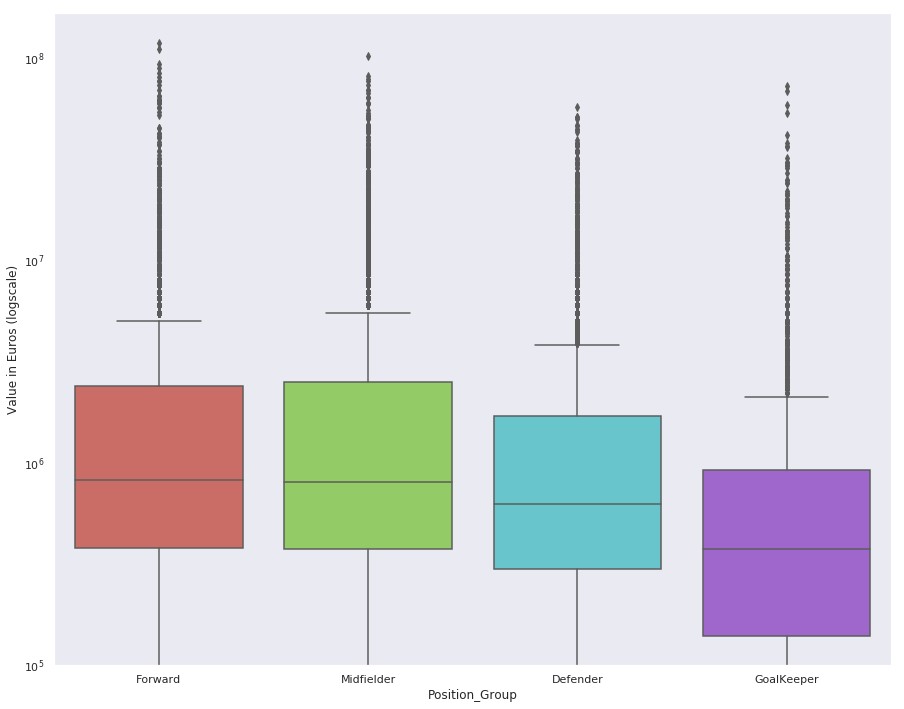

In [0]:
# Initialize the figure with a logarithmic y axis
f, ax = plt.subplots(figsize=(15, 12))
ax.set_yscale("log")

ax = sns.boxplot(x= 'Position_Group', y= 'Value_float', data = fifa, 
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'], palette = 'hls')

ax.set_ylabel('Value in Euros (logscale)')

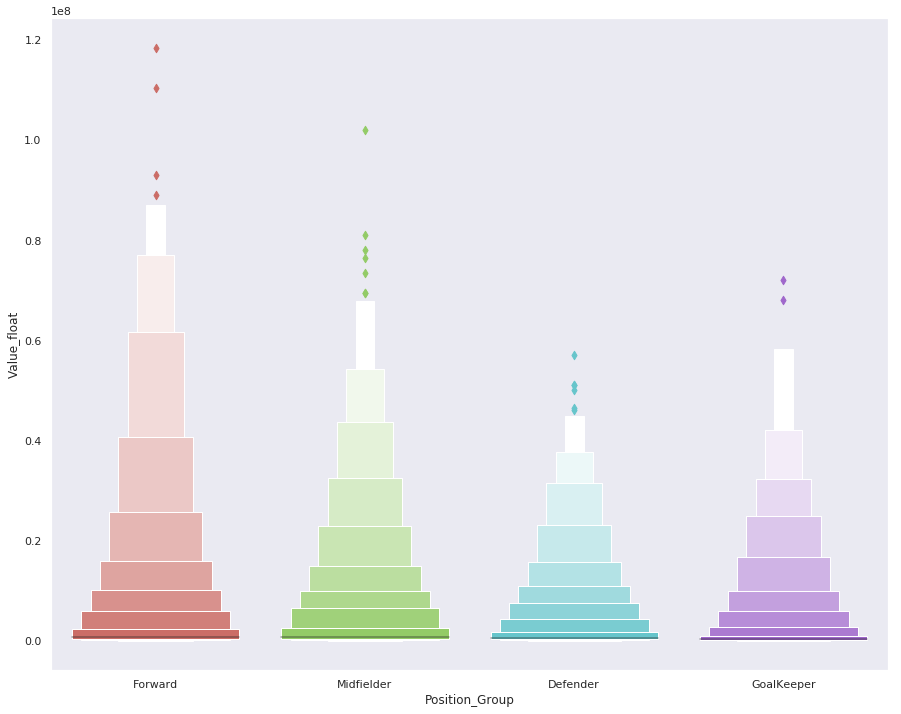

In [0]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxenplot(x= 'Position_Group', y= 'Value_float', data = fifa, scale = 'linear',
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'], palette = 'hls')


## Age Analysis

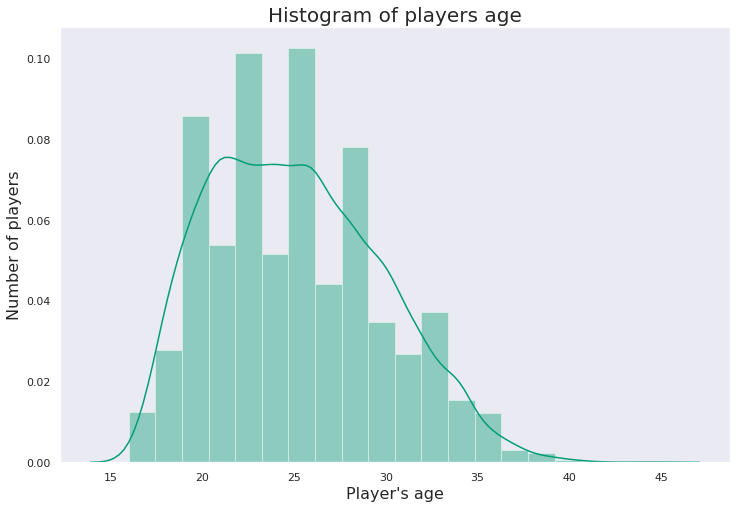

In [0]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = fifa.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

## Correlation/Relationship Analysis

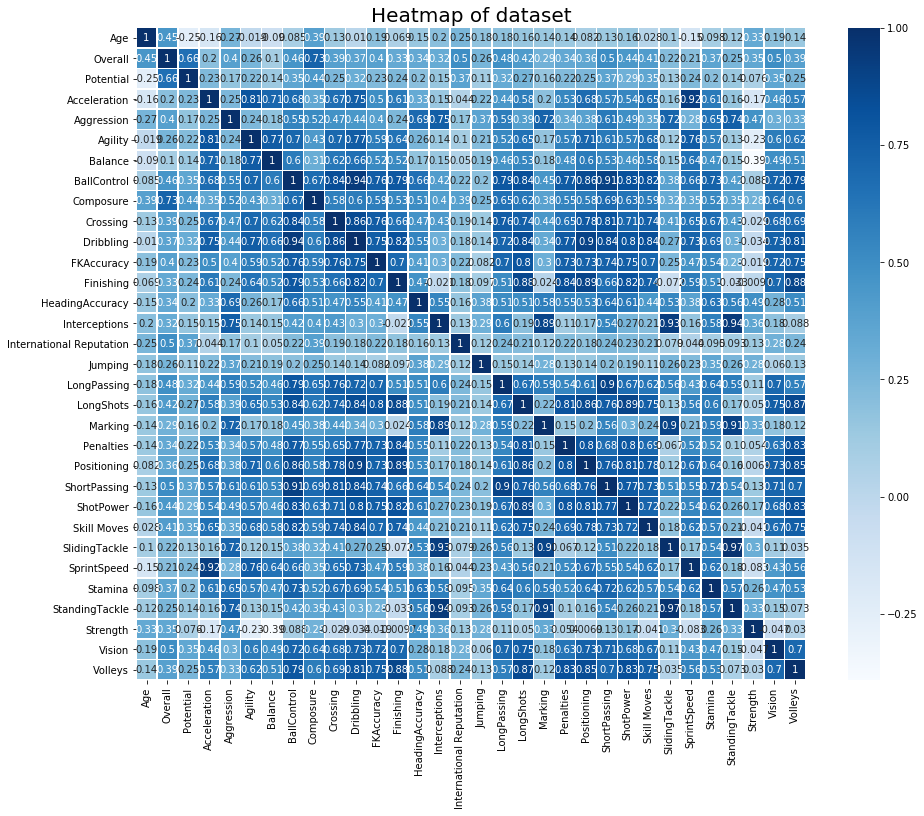

In [0]:
# Correlation heatmap
#plt.rcParams['figure.figsize']=(25,16)

f, ax = plt.subplots(figsize=(15, 12))

hm=sns.heatmap(fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



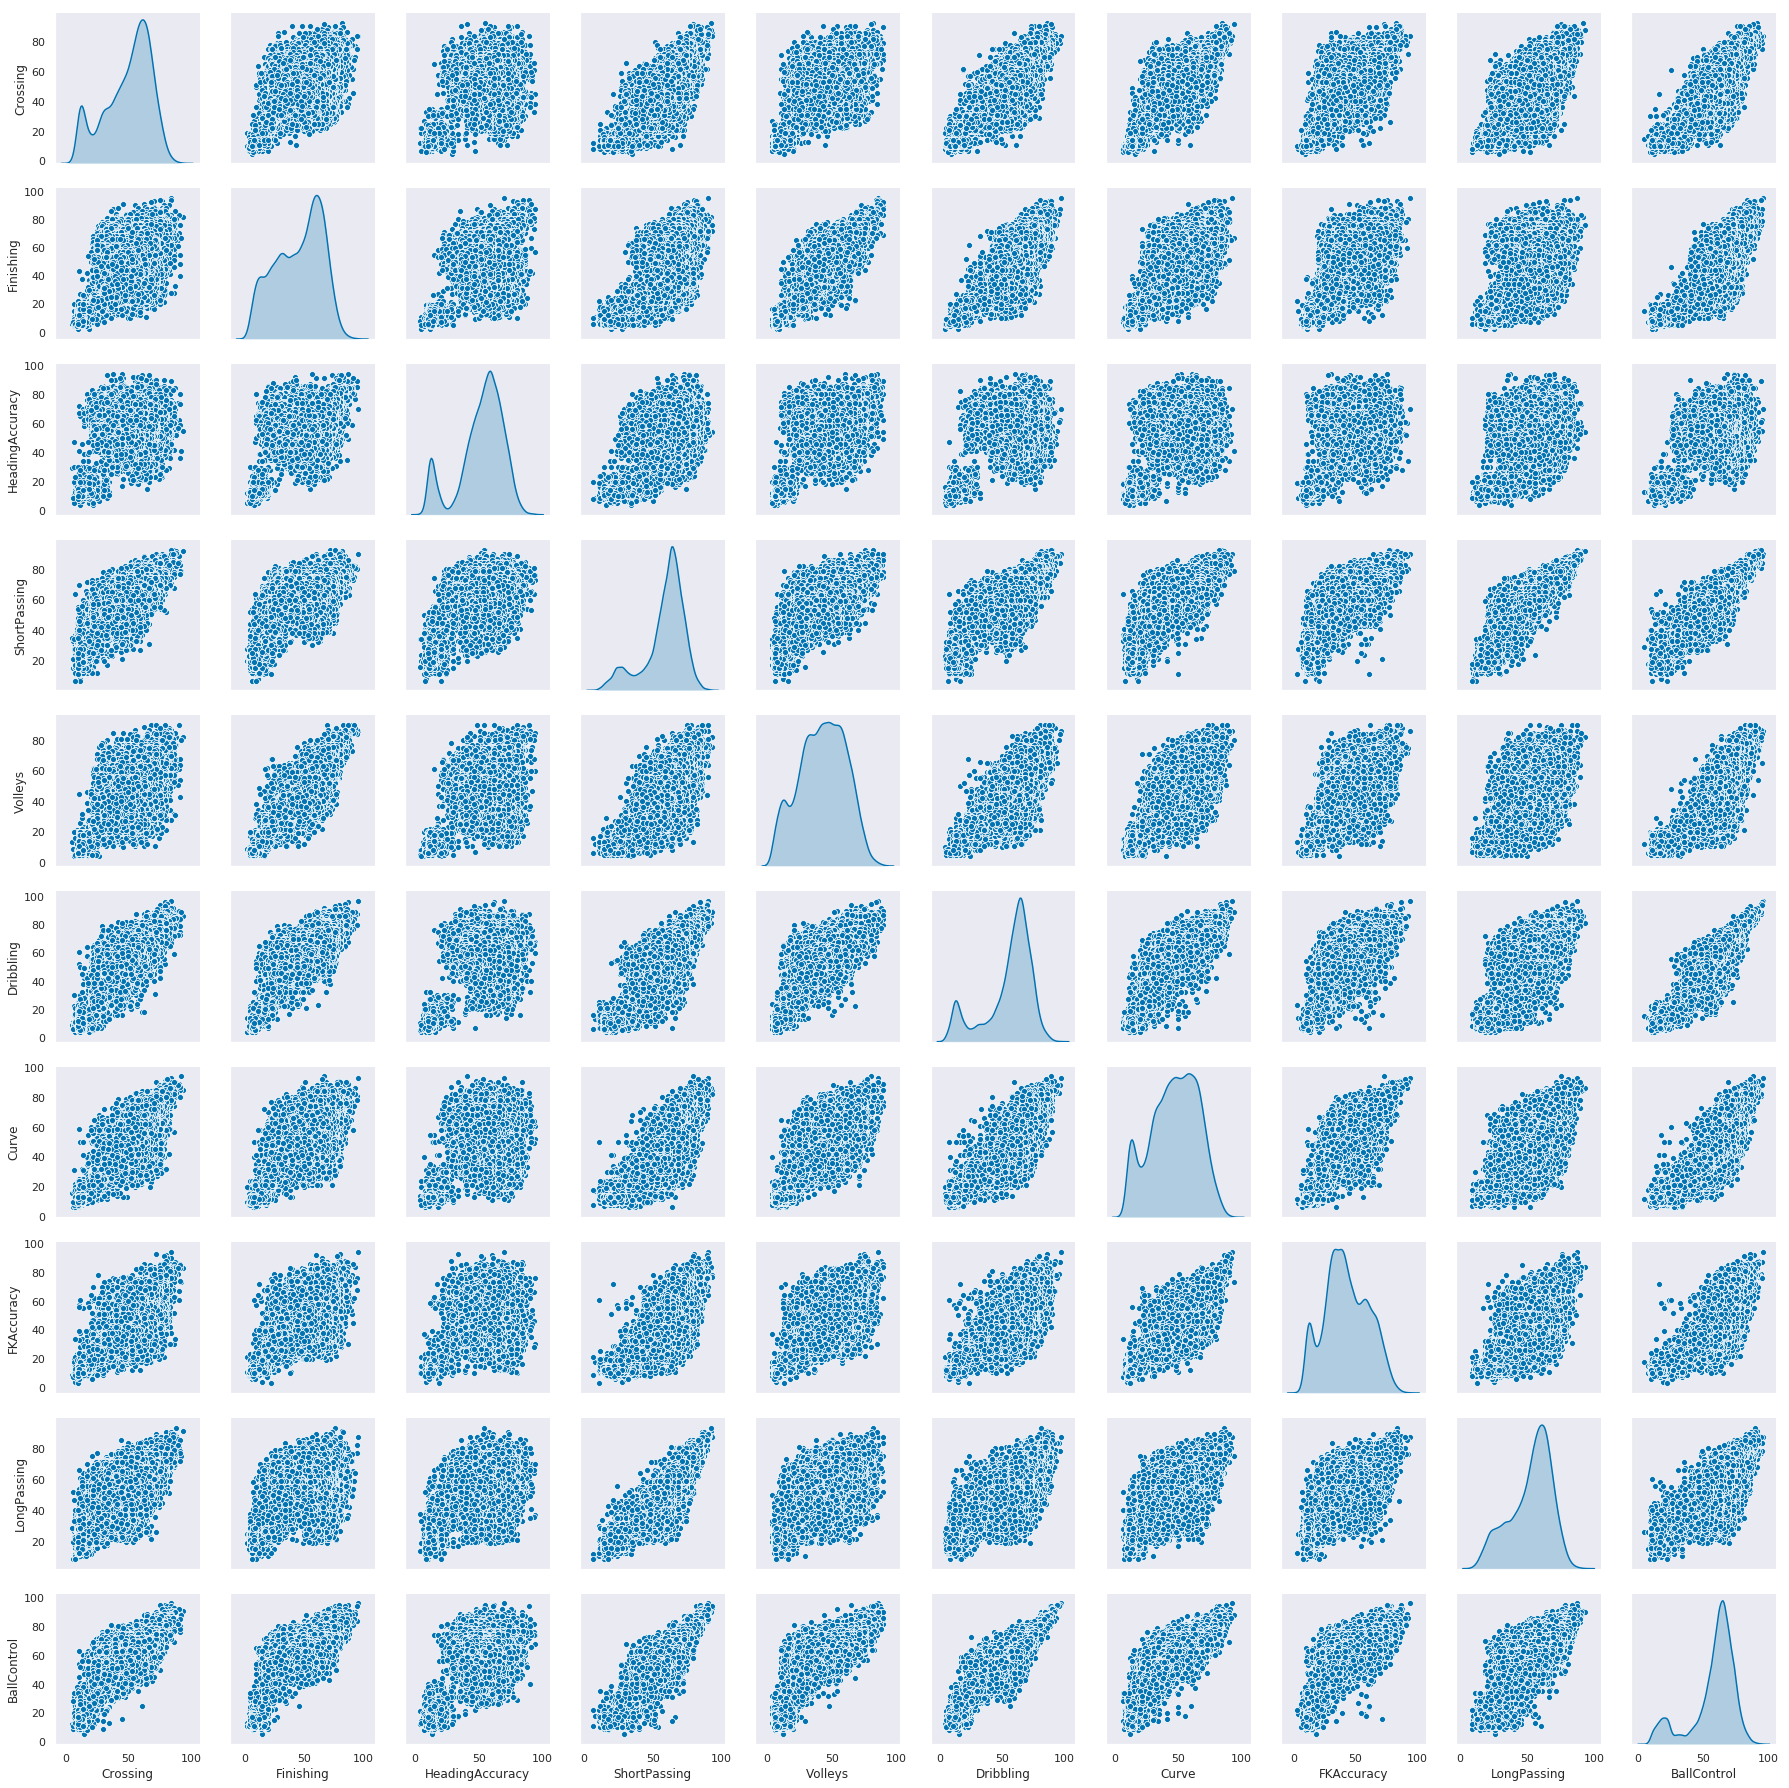

In [0]:
numeric_cols = list(fifa.dtypes[fifa.dtypes == 'float64'].index)

sns.pairplot(data = fifa.loc[:,numeric_cols[4:14]], diag_kind="kde")

# Clustering

In [0]:
numeric_fifa = fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

#Limit to only popular clubs (reputation over 45)
numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


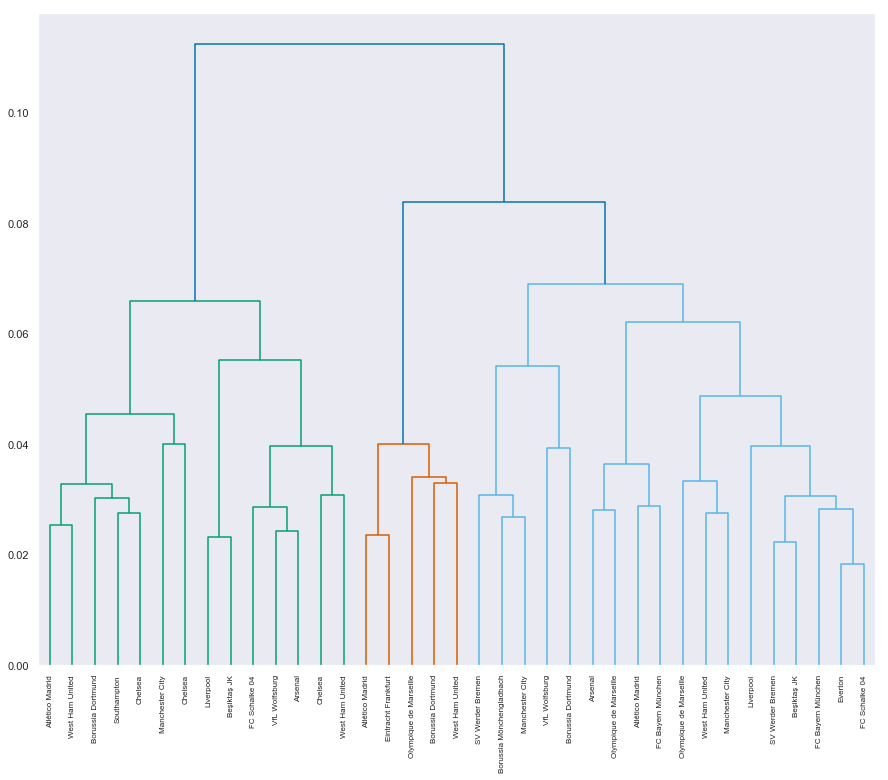

In [0]:
# Any Pre-processing needed?
normalized_numeric = normalize(numeric_values)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=club_labels,
    leaf_rotation=90.,
    leaf_font_size=8)


plt.show()

In [0]:
fifa.Club.nunique()

651

In [0]:
fifa.Club.value_counts()

Borussia Dortmund                33
Rayo Vallecano                   33
Fortuna Düsseldorf               33
Atlético Madrid                  33
Empoli                           33
Wolverhampton Wanderers          33
Everton                          33
Burnley                          33
Eintracht Frankfurt              33
Arsenal                          33
Southampton                      33
FC Barcelona                     33
Frosinone                        33
Tottenham Hotspur                33
Liverpool                        33
Cardiff City                     33
TSG 1899 Hoffenheim              33
Manchester United                33
RC Celta                         33
AS Monaco                        33
CD Leganés                       33
Real Madrid                      33
Newcastle United                 33
Manchester City                  33
Valencia CF                      33
Chelsea                          33
Villarreal CF                    32
Fulham                      

In [0]:
fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

,International Reputation
Club,
FC Barcelona,74.0
FC Bayern München,73.0
Chelsea,70.0
Manchester United,69.0
Manchester City,69.0
Real Madrid,69.0
Arsenal,67.0
Paris Saint-Germain,67.0
Borussia Dortmund,66.0
